# DSA210 Term Project – Analysis of Work Hours, Happiness, and Mental Health

This notebook documents the full process of analyzing the relationship between working hours, happiness, and mental health. The analysis is conducted as part of the DSA210 Term Project.

The following data science workflow is followed throughout the study:
1. **Loading datasets**
2. **Initial exploration and data cleaning**
3. **Exploratory Data Analysis (EDA)**
4. **Statistical hypothesis testing**
5. **Visualization of findings**
6. **Applying ML Methods**
7. **Discussion of results and limitations**

### Data Sources:
The datasets are obtained from *Our World in Data* and include:
- `Annual Working Hours`: average annual working hours per person employed.
- `Mental Health Burden`: DALYs (Disability-Adjusted Life Years) related to mental disorders.
- `Happiness`: survey-based data indicating the share of people who describe themselves as happy.
- `Life Satisfaction`: survey data on self-reported life satisfaction levels.

The objective of this analysis is to examine whether excessive working hours are associated with lower levels of happiness and increased mental health challenges.


In [1]:
# Importing required libraries
import pandas as pd

# Defining base path for the data files
base_path = r'C:\Users\7981\Desktop\DSA201\DSA210-Term-Project-Spring2025\data'

# Loading datasets
df_work = pd.read_csv(base_path + r'\annual-working-hours-per-person-employed.csv')
df_mental = pd.read_csv(base_path + r'\mentaldisorders.csv')
df_happy = pd.read_csv(base_path + r'\share-of-people-who-say-they-are-happy.csv')
df_satisfy = pd.read_csv(base_path + r'\share-of-people-who-say-they-are-satisfied.csv')


## 1. Preview of Each Dataset
Let's look at the first few rows of each dataset to understand their structure.


In [2]:
# Previewing datasets

print("Working Hours Data:")
display(df_work.head())

print("Mental Health Disorders Data:")
display(df_mental.head())

print("Happiness Data:")
display(df_happy.head())

print("Life Satisfaction Data:")
display(df_satisfy.head())


Working Hours Data:


,Entity,Code,Year,Subject:Average hours worked per person employed - PDB_LV
0,Australia,AUS,1970,1864.935951
1,Australia,AUS,1971,1847.040484
2,Australia,AUS,1972,1827.516925
3,Australia,AUS,1973,1814.705069
4,Australia,AUS,1974,1831.279122


Mental Health Disorders Data:


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,1,Number,2021,5.638814e-05,6.509461e-05,2.776283e-05
1,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,2,Percent,2021,2.439168e-09,2.801477e-09,1.208993e-09
2,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,3,Rate,2021,2.724524e-06,3.145197e-06,1.341425e-06
3,1,Deaths,55,Slovenia,3,Both,22,All ages,572,Eating disorders,1,Number,2021,5.638814e-05,6.509461e-05,2.776283e-05
4,1,Deaths,55,Slovenia,3,Both,22,All ages,572,Eating disorders,2,Percent,2021,2.439168e-09,2.801477e-09,1.208993e-09


Happiness Data:


,Entity,Code,Year,Happiness: Happy (aggregate),821407-annotations
0,Albania,ALB,1998,33.43343,NaN
1,Albania,ALB,2004,58.80000,NaN
2,Albania,ALB,2010,66.85212,NaN
3,Albania,ALB,2022,73.92710,NaN
4,Algeria,DZA,2004,80.73323,NaN


Life Satisfaction Data:


,Entity,Code,Year,Share of people who are happy (Eurobarometer 2017)
0,Albania,ALB,2014,58.685448
1,Albania,ALB,2015,62.037964
2,Albania,ALB,2016,59.073544
3,Austria,AUT,1996,93.234474
4,Austria,AUT,1997,83.727531


## 2. Dataset Overview: Dimensions, Column Names, and Missing Values

This section provides a structural overview of the datasets:
- Number of rows and columns in each dataset
- Column names to understand available variables
- Presence of missing values that may require further cleaning


In [4]:
# Checking dataset shapes
print("Dataset Shapes:")
print("Working Hours:", df_work.shape)
print("Mental Disorders:", df_mental.shape)
print("Happiness:", df_happy.shape)
print("Life Satisfaction:", df_satisfy.shape)

# Checking column names
print("\nColumn Names:")
print("Working Hours:", df_work.columns.tolist())
print("Mental Disorders:", df_mental.columns.tolist())
print("Happiness:", df_happy.columns.tolist())
print("Life Satisfaction:", df_satisfy.columns.tolist())

# Checking missing values
print("\nMissing Value Counts:")
print("Working Hours:\n", df_work.isnull().sum())
print("\nMental Disorders:\n", df_mental.isnull().sum())
print("\nHappiness:\n", df_happy.isnull().sum())
print("\nLife Satisfaction:\n", df_satisfy.isnull().sum())


Dataset Shapes:
Working Hours: (1568, 4)
Mental Disorders: (31356, 16)
Happiness: (423, 5)
Life Satisfaction: (809, 4)

Column Names:
Working Hours: ['Entity', 'Code', 'Year', 'Subject:Average hours worked per person employed - PDB_LV']
Mental Disorders: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
Happiness: ['Entity', 'Code', 'Year', 'Happiness: Happy (aggregate)', '821407-annotations']
Life Satisfaction: ['Entity', 'Code', 'Year', 'Share of people who are happy (Eurobarometer 2017)']

Missing Value Counts:
Working Hours:
 Entity                                                         0
Code                                                         155
Year                                                           0
Subject:Average hours worked per person employed - PDB_LV      0
dtype: int64

Mental Disorders:
 measure_id       0
measure_

### 3.1 Happiness Dataset Cleaning

This section focuses on cleaning the happiness dataset.

- The column `821407-annotations` contains no usable information and will be removed.
- The main value column `Happiness: Happy (aggregate)` will be renamed to `Happiness` for simplicity.
- The column names will be standardized to allow easier merging and analysis.


In [ ]:
# Copying original to avoid modifying raw data
df_happy_cleaned = df_happy.copy()

# Dropping empty annotation column
df_happy_cleaned.drop(columns=['821407-annotations'], inplace=True)

# Renaming column for simplicity
df_happy_cleaned.rename(columns={
    'Happiness: Happy (aggregate)': 'Happiness'
}, inplace=True)

# Save the cleaned happiness dataset
df_happy_cleaned.to_csv('cleaned_data/happiness_cleaned.csv', index=False)


### 3.2 Life Satisfaction Dataset Cleaning

This section handles the cleaning of the life satisfaction dataset.

- The dataset contains the percentage of people who say they are satisfied with their life.
- The column `Share of people who are happy (Eurobarometer 2017)` will be renamed to `LifeSatisfaction`.
- The column `Code` contains missing values but is not essential for our analysis, so it will be kept as is.


In [ ]:
# Copy original
df_satisfy_cleaned = df_satisfy.copy()

# Rename column for simplicity
df_satisfy_cleaned.rename(columns={
    'Share of people who are happy (Eurobarometer 2017)': 'LifeSatisfaction'
}, inplace=True)

# Save the cleaned version
df_satisfy_cleaned.to_csv('cleaned_data/life_satisfaction_cleaned.csv', index=False)


### 3.3 Working Hours Dataset Cleaning

This section focuses on cleaning the working hours dataset.

- The column `Subject:Average hours worked per person employed - PDB_LV` will be renamed to `WorkingHours` for clarity and ease of use.
- The column `Code` contains missing values, but since `Entity` and `Year` are sufficient for merging and analysis, no rows will be dropped.



In [9]:
# Copying original
df_work_cleaned = df_work.copy()

# Rename the long column name
df_work_cleaned.rename(columns={
    'Subject:Average hours worked per person employed - PDB_LV': 'WorkingHours'
}, inplace=True)

df_work_cleaned.to_csv('cleaned_data/working_hours_cleaned.csv', index=False)


### 3.4 Mental Health Dataset Cleaning

The mental health dataset includes disease burden indicators by country, year, sex, age group, and disorder type.

To make it suitable for analysis:
- The dataset is filtered by:
  - `measure_name`: DALYs (Disability-Adjusted Life Years)
  - `metric_name`: Rate (DALYs per 100,000 population)
  - `sex_name`: Both
  - `age_name`: All ages
  - `cause_name`: Mental disorders
- The cleaned dataset retains only:
  - `Entity` (renamed from `location_name`)
  - `Year`
  - `MentalHealthDALY` (renamed from `val`)


In [ ]:
# Copying the original dataset
df_mental_cleaned = df_mental.copy()

# Apply necessary filters
df_mental_cleaned = df_mental_cleaned[
    (df_mental_cleaned['age_name'] == 'All ages') &
    (df_mental_cleaned['sex_name'] == 'Both') &
    (df_mental_cleaned['cause_name'] == 'Mental disorders') 
]

# Rename columns
df_mental_cleaned = df_mental_cleaned.rename(columns={
    'location_name': 'Entity',
    'year': 'Year',
    'val': 'MentalHealthDALY'
})

# Select only necessary columns
df_mental_cleaned = df_mental_cleaned[['Entity', 'Year', 'MentalHealthDALY']]

# Preview cleaned data
df_mental_cleaned.head()

df_mental_cleaned.to_csv('cleaned_data/mental_health_cleaned.csv', index=False)

,Entity,Year,MentalHealthDALY
0,Slovenia,2021,5.638814e-05
1,Slovenia,2021,2.439168e-09
2,Slovenia,2021,2.724524e-06
6,Sudan,2018,3.506767e-03
7,Sudan,2018,1.739212e-08


### Step 1 – Country-Level Averages and Initial Visualizations

Given the temporal inconsistency across datasets—some spanning decades, others limited to a few scattered years—conducting year-based comparisons would result in significant data loss and analytic distortion.

To ensure standardized, cross-national comparison:
- The average values of **working hours**, **happiness**, **life satisfaction**, and **mental health burden (DALYs)** were calculated per country.
- These aggregated indicators provide a stable representation of each country’s typical condition, mitigating the effects of missing or inconsistent time-series data.
- The resulting values serve as unified metrics for comparative analysis, correlation testing, and visual exploration.

The visualizations below present the **top 10 countries** for each of the measured variables:
- 🔴 Highest average working hours  
- 🟢 Highest average happiness levels  
- 🔵 Highest average life satisfaction  
- 🟣 Highest average mental health burden (DALYs)


C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_work, x="WorkingHours", y="Entity", palette="Reds_d")


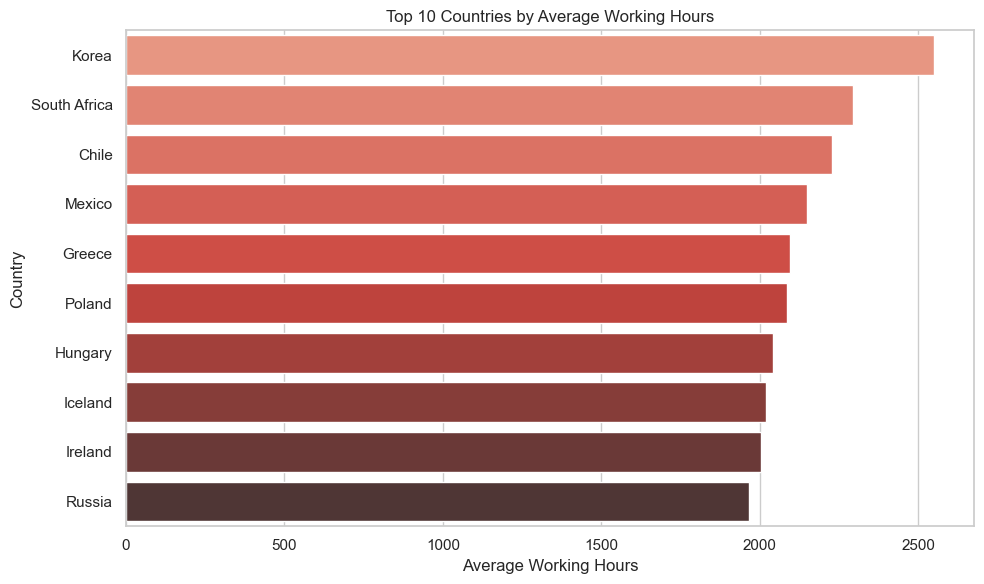

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_happy, x="Happiness", y="Entity", palette="Greens_d")


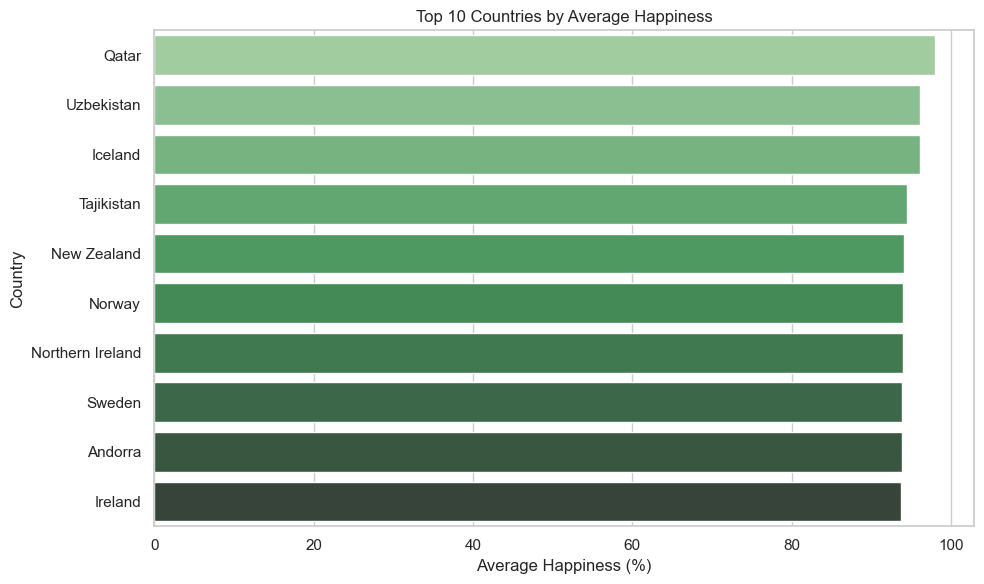

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_satisfy, x="LifeSatisfaction", y="Entity", palette="Blues_d")


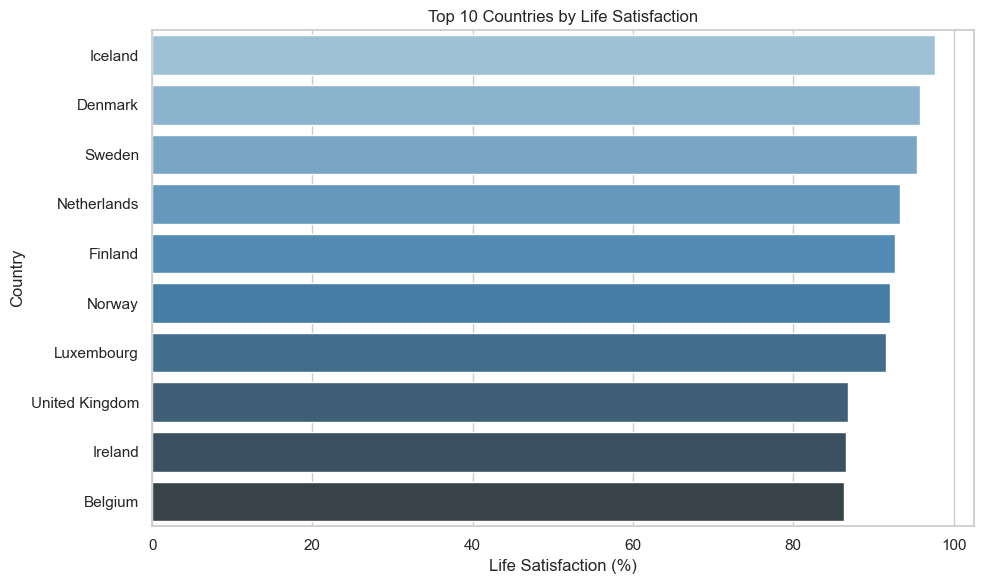

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mental, x="MentalHealthDALY", y="Entity", palette="Purples_d")


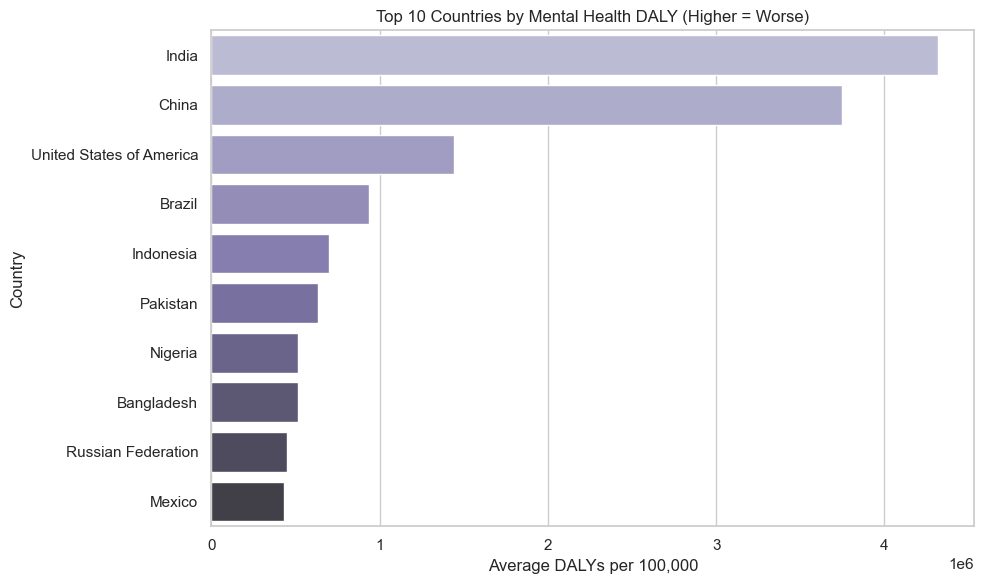

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_work_cleaned = pd.read_csv("cleaned_data/working_hours_cleaned.csv")
df_happy_cleaned = pd.read_csv("cleaned_data/happiness_cleaned.csv")
df_satisfy_cleaned = pd.read_csv("cleaned_data/life_satisfaction_cleaned.csv")
df_mental_cleaned = pd.read_csv("cleaned_data/mental_health_cleaned.csv")

df_work_avg = df_work_cleaned.groupby("Entity", as_index=False)["WorkingHours"].mean()
df_happy_avg = df_happy_cleaned.groupby("Entity", as_index=False)["Happiness"].mean()
df_satisfy_avg = df_satisfy_cleaned.groupby("Entity", as_index=False)["LifeSatisfaction"].mean()
df_mental_avg = df_mental_cleaned.groupby("Entity", as_index=False)["MentalHealthDALY"].mean()

sns.set(style="whitegrid")

# Plot 1: Top 10 countries by Working Hours
plt.figure(figsize=(10, 6))
top_work = df_work_avg.sort_values(by="WorkingHours", ascending=False).head(10)
sns.barplot(data=top_work, x="WorkingHours", y="Entity", palette="Reds_d")
plt.title("Top 10 Countries by Average Working Hours")
plt.xlabel("Average Working Hours")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 2: Top 10 countries by Happiness
plt.figure(figsize=(10, 6))
top_happy = df_happy_avg.sort_values(by="Happiness", ascending=False).head(10)
sns.barplot(data=top_happy, x="Happiness", y="Entity", palette="Greens_d")
plt.title("Top 10 Countries by Average Happiness")
plt.xlabel("Average Happiness (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 3: Top 10 countries by Life Satisfaction
plt.figure(figsize=(10, 6))
top_satisfy = df_satisfy_avg.sort_values(by="LifeSatisfaction", ascending=False).head(10)
sns.barplot(data=top_satisfy, x="LifeSatisfaction", y="Entity", palette="Blues_d")
plt.title("Top 10 Countries by Life Satisfaction")
plt.xlabel("Life Satisfaction (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 4: Top 10 countries by Mental Health DALY
plt.figure(figsize=(10, 6))
top_mental = df_mental_avg.sort_values(by="MentalHealthDALY", ascending=False).head(10)
sns.barplot(data=top_mental, x="MentalHealthDALY", y="Entity", palette="Purples_d")
plt.title("Top 10 Countries by Mental Health DALY (Higher = Worse)")
plt.xlabel("Average DALYs per 100,000")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Metric Overview

This dashboard provides a quick visual overview of all four metrics across countries.  
It highlights distribution, outliers, and possible clustering trends.


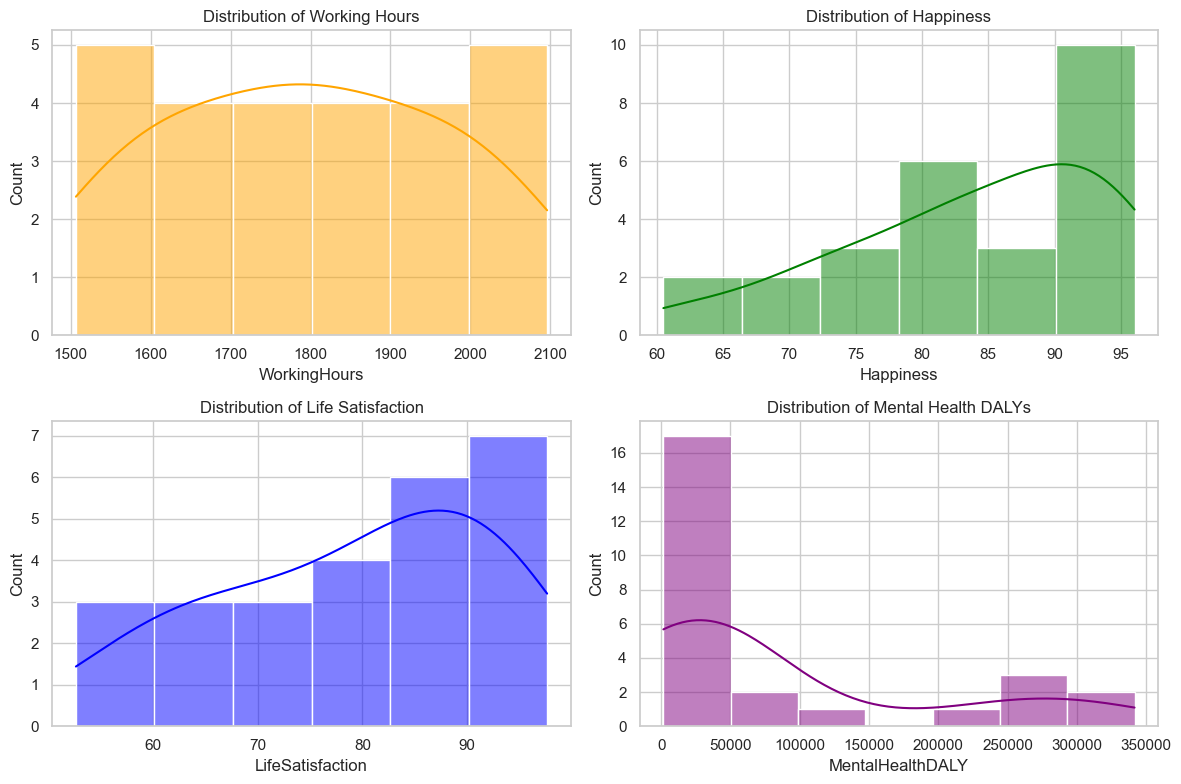

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df_all['WorkingHours'], ax=axs[0, 0], kde=True, color='orange')
axs[0, 0].set_title("Distribution of Working Hours")

sns.histplot(df_all['Happiness'], ax=axs[0, 1], kde=True, color='green')
axs[0, 1].set_title("Distribution of Happiness")

sns.histplot(df_all['LifeSatisfaction'], ax=axs[1, 0], kde=True, color='blue')
axs[1, 0].set_title("Distribution of Life Satisfaction")

sns.histplot(df_all['MentalHealthDALY'], ax=axs[1, 1], kde=True, color='purple')
axs[1, 1].set_title("Distribution of Mental Health DALYs")

plt.tight_layout()
plt.show()


### Step 2 – Hypothesis Test: Do Longer Working Hours Associate with Lower Happiness?

**Hypothesis:** Countries with longer average working hours tend to have lower average happiness levels.

To test this hypothesis, country-level averages from the working hours and happiness datasets were merged based on country names. A scatter plot was used to visually assess the relationship between these two variables.

Then, Pearson correlation analysis was conducted to measure the strength and direction of the linear relationship.

- **x-axis:** Average working hours  
- **y-axis:** Average happiness (in percentage)  


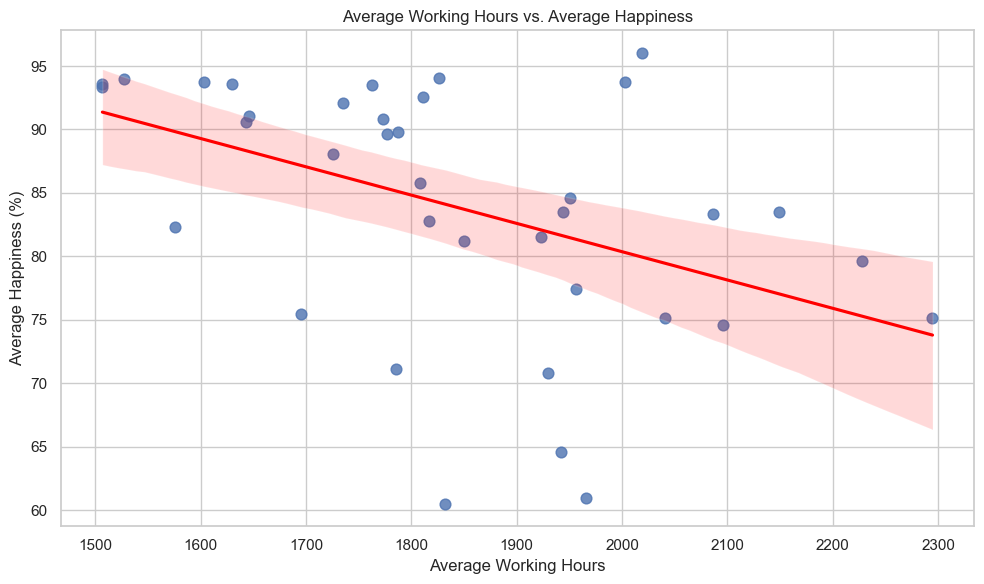

Pearson Correlation: -0.447
P-value: 0.0055


In [ ]:
# Merge working hours and happiness datasets on country
df_work_happy = df_work_avg.merge(df_happy_avg, on="Entity")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df_work_happy, x="WorkingHours", y="Happiness", scatter_kws={"s": 60}, line_kws={"color": "red"})
plt.title("Average Working Hours vs. Average Happiness")
plt.xlabel("Average Working Hours")
plt.ylabel("Average Happiness (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
from scipy.stats import pearsonr

corr, pval = pearsonr(df_work_happy["WorkingHours"], df_work_happy["Happiness"])
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {pval:.4f}")


**Result:**

The Pearson correlation coefficient between average working hours and average happiness is **–0.447**, indicating a moderate negative relationship. This suggests that, in general, countries where people work longer hours tend to report lower levels of happiness. The correlation is statistically significant (**p = 0.0055**), meaning the observed relationship is unlikely to have occurred by chance. This result supports the hypothesis that excessive working hours may negatively impact happiness on a national scale.


### Step 3 – Hypothesis Test: Do Longer Working Hours Correlate with Lower Life Satisfaction?

**Hypothesis:** Countries with longer average working hours tend to report lower life satisfaction.

To explore this hypothesis, average working hours and average life satisfaction data were merged at the country level.  
A scatter plot was created to visualize the relationship, and Pearson correlation analysis was performed to evaluate the strength and direction of the relationship.

- **x-axis:** Average working hours  
- **y-axis:** Average life satisfaction (%)

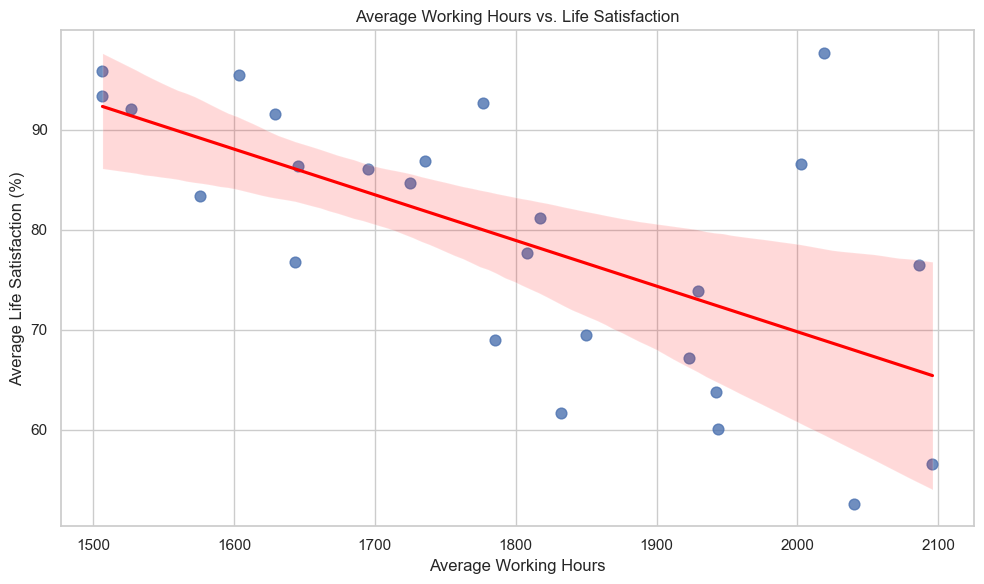

Pearson Correlation: -0.629
P-value: 0.0006


In [ ]:
# Merge working hours and life satisfaction
df_work_satisfy = df_work_avg.merge(df_satisfy_avg, on="Entity")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_work_satisfy, x="WorkingHours", y="LifeSatisfaction", scatter_kws={"s": 60}, line_kws={"color": "red"})
plt.title("Average Working Hours vs. Life Satisfaction")
plt.xlabel("Average Working Hours")
plt.ylabel("Average Life Satisfaction (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
from scipy.stats import pearsonr
corr2, pval2 = pearsonr(df_work_satisfy["WorkingHours"], df_work_satisfy["LifeSatisfaction"])
print(f"Pearson Correlation: {corr2:.3f}")
print(f"P-value: {pval2:.4f}")


**Result:**

The Pearson correlation coefficient between average working hours and life satisfaction was **–0.629**, indicating a strong negative linear relationship. This means that countries where people tend to work longer hours also report significantly lower life satisfaction on average. The p-value of **0.0006** confirms that this relationship is statistically significant at the 0.1% level. These results strongly support the hypothesis that excessive working hours may negatively affect individuals' perceived life quality.


### Step 4 – Hypothesis Test: Do Longer Working Hours Associate with Higher Mental Health Burden?

**Hypothesis:** Countries with longer average working hours are expected to exhibit higher levels of mental health burden, measured as Disability-Adjusted Life Years (DALYs) per 100,000 people.

To test this hypothesis, average working hours and average mental health burden (DALYs) were merged by country. A scatter plot was used to visualize the relationship, and Pearson correlation analysis was applied to measure its strength and direction.

- **x-axis:** Average working hours  
- **y-axis:** Mental health DALYs (higher values = worse mental health outcomes)

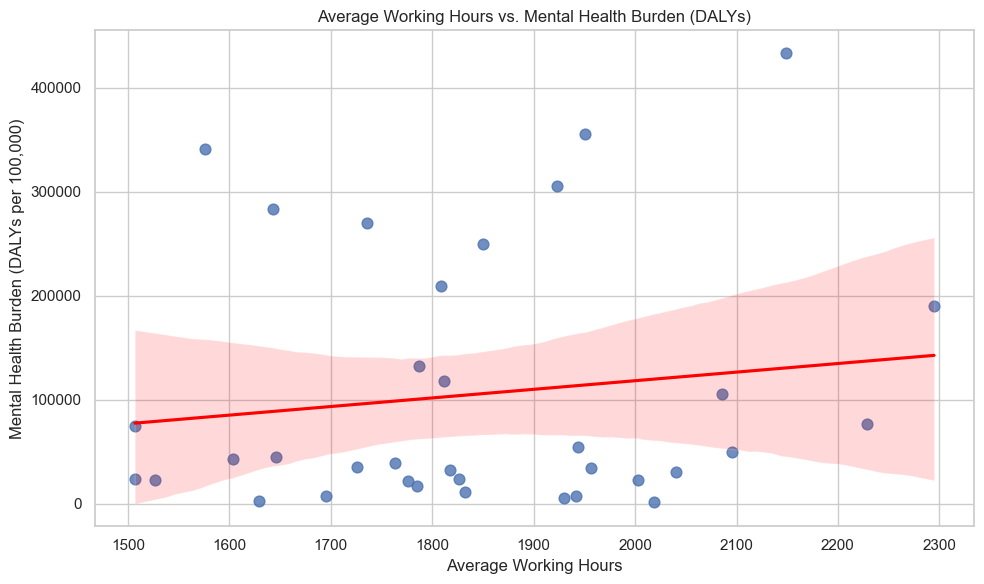

Pearson Correlation: 0.136
P-value: 0.4358


In [ ]:
# Merge working hours and mental health DALYs
df_work_mental = df_work_avg.merge(df_mental_avg, on="Entity")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_work_mental, x="WorkingHours", y="MentalHealthDALY", scatter_kws={"s": 60}, line_kws={"color": "red"})
plt.title("Average Working Hours vs. Mental Health Burden (DALYs)")
plt.xlabel("Average Working Hours")
plt.ylabel("Mental Health Burden (DALYs per 100,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr3, pval3 = pearsonr(df_work_mental["WorkingHours"], df_work_mental["MentalHealthDALY"])
print(f"Pearson Correlation: {corr3:.3f}")
print(f"P-value: {pval3:.4f}")


**Result:**

The Pearson correlation coefficient between average working hours and mental health burden (DALYs) is **0.136**, indicating a very weak positive relationship. This suggests that countries with longer working hours tend to have slightly higher mental health burdens, but the relationship is not strong. Furthermore, the p-value of **0.4358** indicates that the correlation is not statistically significant. This means there is insufficient evidence to conclude a meaningful association between working hours and mental health burden at the country level, based on the current data.


### Step 5 – Hypothesis Test: Do High-Work Countries Suffer More from Mental Health Disorders?

**Hypothesis:** Countries with longer average working hours experience significantly greater mental health burden (measured in DALYs), compared to countries with lower working hours.

To assess this hypothesis, countries were split into two groups based on the median value of average working hours:
- **High Workload Countries**: Above the median
- **Low Workload Countries**: Below the median

An independent samples t-test was conducted to compare the mean DALY scores between the two groups.  


In [ ]:
from scipy.stats import ttest_ind

# Merge working hours and mental health data
df_ttest = df_work_avg.merge(df_mental_avg, on="Entity")

# Split countries into high and low working hours groups
median_work = df_ttest["WorkingHours"].median()
df_ttest["Group"] = df_ttest["WorkingHours"].apply(lambda x: "High Workload" if x > median_work else "Low Workload")

# Group statistics
high_group = df_ttest[df_ttest["Group"] == "High Workload"]["MentalHealthDALY"]
low_group = df_ttest[df_ttest["Group"] == "Low Workload"]["MentalHealthDALY"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_group, low_group, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"High Workload Countries (mean DALY): {high_group.mean():.2f}")
print(f"Low Workload Countries (mean DALY): {low_group.mean():.2f}")


T-statistic: 0.466
P-value: 0.6443
High Workload Countries (mean DALY): 115071.99
Low Workload Countries (mean DALY): 95440.87


**Result:**

The independent samples t-test comparing mental health burden between high and low workload countries yielded a **t-statistic of 0.466** and a **p-value of 0.6443**.  Although the high workload group had a slightly higher mean DALY value (**115,072 vs. 95,441**), this difference is **not statistically significant**. This suggests that the difference in mental health burden between the two groups cannot be confidently attributed to differences in working hours alone. Therefore, this hypothesis is **not supported** by the t-test analysis.


### General Conclusion 

This steps show that **working longer hours is linked to lower happiness and life satisfaction**. In countries where people work more, they generally feel **less happy and less satisfied with life**. This supports the idea that working too much may reduce people's well-being.
But when it comes to **mental health**, the data does not show a clear connection with working hours. This suggests that **mental health is affected by many things**, not just how much people work.  
There are also some limits in the analysis:
- People in different countries may answer happiness questions differently  
- Data is missing in some years or countries  
- Using country averages may hide differences between groups like age or gender
In short, working long hours seems to lower happiness,  but mental health is more complex and needs a deeper look from many angles.


### Step 6 – Visual Summary

This section presents key visualizations that summarize the main relationships between working hours, happiness, life satisfaction, and mental health burden.  


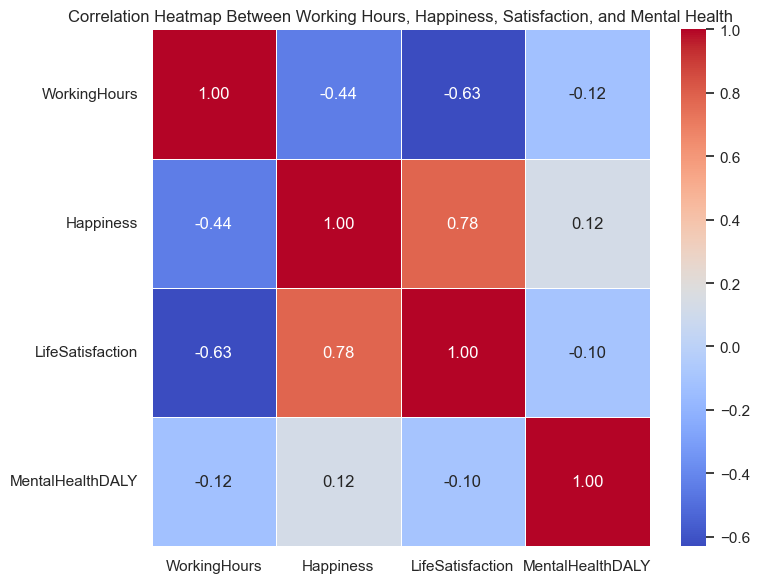

In [ ]:
numeric_cols = ["WorkingHours", "Happiness", "LifeSatisfaction", "MentalHealthDALY"]
df_corr = df_all[numeric_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap Between Working Hours, Happiness, Satisfaction, and Mental Health")
plt.tight_layout()
plt.show()


The heatmap shows that average working hours are negatively correlated with both happiness and life satisfaction.  
In contrast, the correlation between working hours and mental health burden is weak.


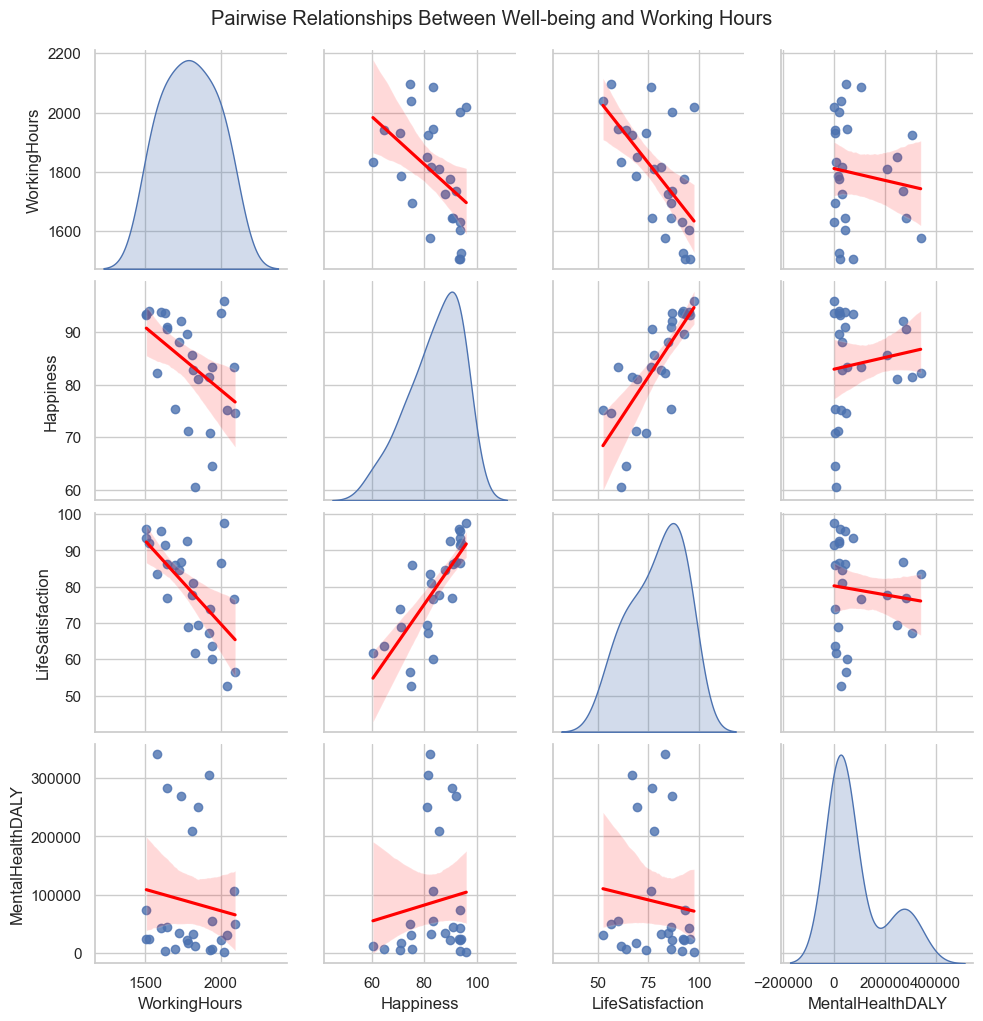

In [20]:
numeric_cols = ["WorkingHours", "Happiness", "LifeSatisfaction", "MentalHealthDALY"]

# Pairplot
sns.pairplot(df_all[numeric_cols], kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.suptitle("Pairwise Relationships Between Well-being and Working Hours", y=1.02)
plt.show()


The pairplot highlights clear negative relationships between working hours and both happiness and life satisfaction. In contrast, the association between working hours and mental health burden appears weak and visually inconsistent.


### Summary of Hypotheses and Findings

The table below summarizes the tested hypotheses, statistical outcomes, and interpretations.

| Hypothesis | Supported | p-value | Interpretation |
|------------|-----------|---------|----------------|
| Longer working hours → ↓ Happiness | ✅ Yes | 0.0055 | Significant negative correlation |
| Longer working hours → ↓ Life Satisfaction | ✅ Strongly | 0.0006 | Strong negative correlation |
| Longer working hours → ↑ Mental Health DALY | ❌ No | 0.4358 | Weak and not significant |
| High workload → ↑ DALY (t-test) | ❌ No | 0.6443 | Group difference not significant |


### Step 7  
### Dataset: Working Hours and General Happiness

This step focuses on the creation of a new dataset for predictive analysis.

The dataset combines `WorkingHours` information with two sources related to happiness:
- Reported Happiness levels
- Reported Life Satisfaction levels

Certain countries contain data for Happiness, while others contain data for Life Satisfaction.  
In order to maximize country coverage and the number of valid observations, both sources are accepted.

A unified target variable named `GeneralHappiness` is introduced.  
If Happiness data is available for a given country and year, it is selected.  
If Happiness is not available but Life Satisfaction is present, then Life Satisfaction is used.

This approach allows:
- Inclusion of more countries
- Greater data quantity for training machine learning models

The final dataset structure supports the development of a regression model  
to estimate general happiness based on average annual working hours.


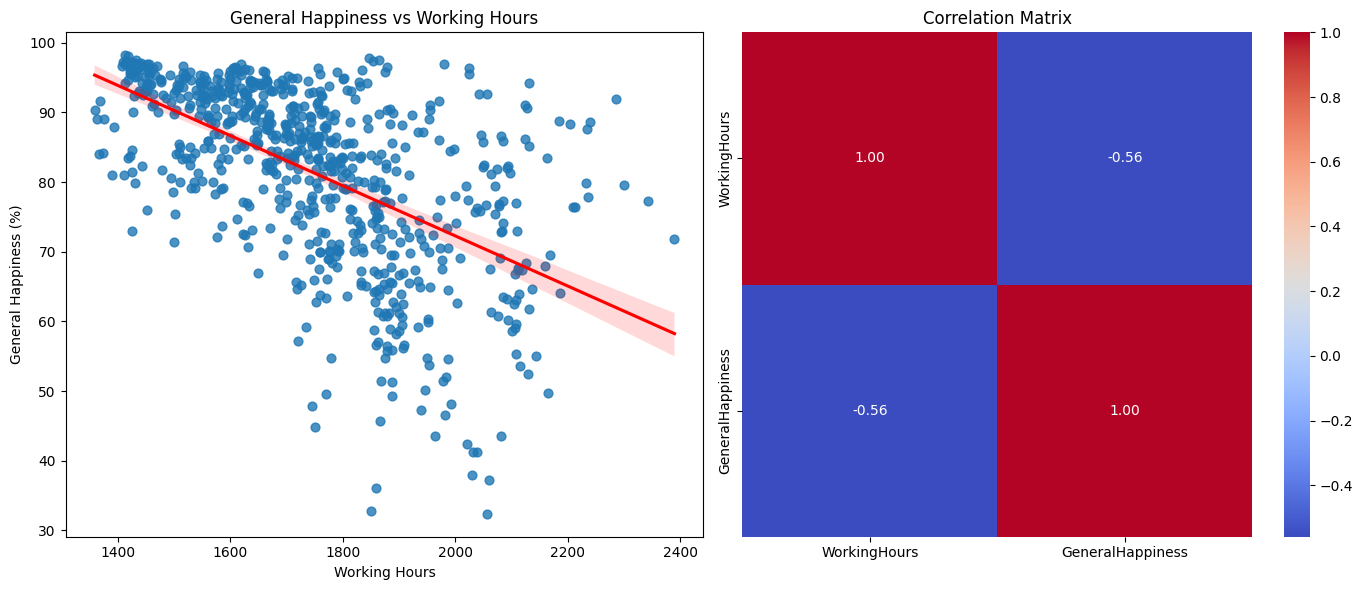

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_work = pd.read_csv("cleaned_data/working_hours_cleaned.csv")
df_happy = pd.read_csv("cleaned_data/happiness_cleaned.csv")
df_satisfy = pd.read_csv("cleaned_data/life_satisfaction_cleaned.csv")

# Merge 1: WorkHours + Happiness
df_h1 = df_work.merge(df_happy, on=["Entity", "Year"], how="inner")
df_h1["GeneralHappiness"] = df_h1["Happiness"]
df_h1 = df_h1[["Entity", "Year", "WorkingHours", "GeneralHappiness"]]

# Merge 2: WorkHours + LifeSatisfaction
df_h2 = df_work.merge(df_satisfy, on=["Entity", "Year"], how="inner")
df_h2["GeneralHappiness"] = df_h2["LifeSatisfaction"]
df_h2 = df_h2[["Entity", "Year", "WorkingHours", "GeneralHappiness"]]

# Combine both datasets, drop duplicates
df_combined = pd.concat([df_h1, df_h2], ignore_index=True)
df_combined = df_combined.drop_duplicates(subset=["Entity", "Year"])

# Drop NA if any
df_combined = df_combined.dropna(subset=["WorkingHours", "GeneralHappiness"])

# Save to file
df_combined.to_csv("cleaned_data/workinghours_generalhappiness_merged.csv", index=False)

# Visual Summary
plt.figure(figsize=(14, 6))

# Scatter
plt.subplot(1, 2, 1)
sns.regplot(data=df_combined, x="WorkingHours", y="GeneralHappiness", scatter_kws={"s": 40}, line_kws={"color": "red"})
plt.title("General Happiness vs Working Hours")
plt.xlabel("Working Hours")
plt.ylabel("General Happiness (%)")

# Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_combined[["WorkingHours", "GeneralHappiness"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()


### Step 8-9  
### Predicting General Happiness using Working Hours + Model Evaluation

In this step, a simple linear regression model is trained. The goal is to predict `GeneralHappiness` by using only `WorkingHours` as input.

The dataset includes:
- Input feature: `WorkingHours`
- Target variable: `GeneralHappiness`

The data is split into two parts:
- 80% is used for training
- 20% is used for testing

After training the model, the predictions are evaluated using:
- R² score (how well the model explains the data)
- MAE (average error)
- RMSE (error size)

Two plots are also created:
1. **Actual vs Predicted** — to compare predicted and true values.
2. **Residual Distribution** — to check how errors are spread out.

These steps help understand the model quality and prediction accuracy.


c:\Users\7981\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


📊 Model Performance:
R-squared (R²): 0.307
Mean Absolute Error (MAE): 7.52
Root Mean Squared Error (RMSE): 9.51


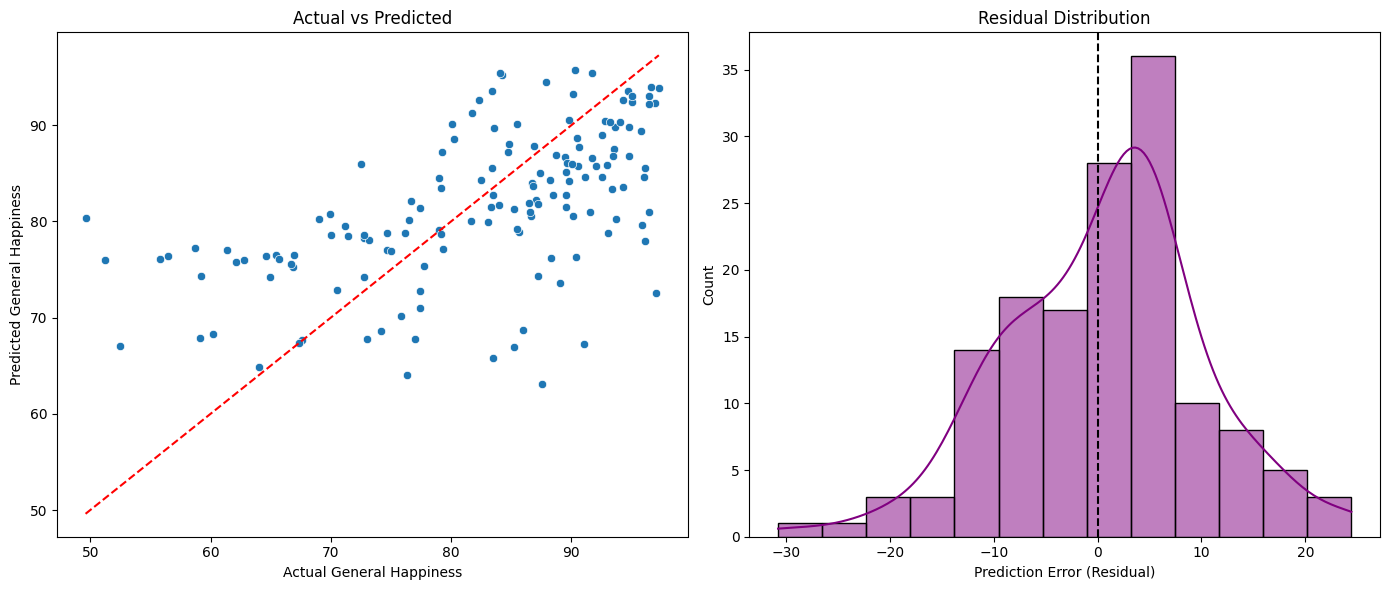

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load the prepared dataset
df = pd.read_csv("cleaned_data/workinghours_generalhappiness_merged.csv")

# 2. Define feature (X) and target (y)
X = df[["WorkingHours"]]              # input: working hours
y = df["GeneralHappiness"]            # output: general happiness score

# 3. Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 7. Print performance results
print("📊 Model Performance:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 8. Visualization: Actual vs Predicted and Residuals
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual General Happiness")
plt.ylabel("Predicted General Happiness")
plt.title("Actual vs Predicted")

# Plot 2: Residual Distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color="purple")
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Prediction Error (Residual)")
plt.title("Residual Distribution")

plt.tight_layout()
plt.show()


### Step 10  
### Improving the Model with Mental Health Data

In this step, the regression model is improved by adding mental health data.  
The new feature is `MentalHealthDALY`, which shows how much people suffer from mental disorders in each country.

Instead of matching by year, the datasets are merged by country name (`Entity`) only.  
This allows more countries to be included in the model.

The new model uses:
- `WorkingHours`
- `MentalHealthDALY`

The target is still:
- `GeneralHappiness`

The model is evaluated using:
- R² (explained variance)
- MAE (average prediction error)
- RMSE (size of errors)

Two plots are created:
1. Actual vs Predicted values
2. Residual distribution (prediction errors)

This step helps to see if adding health data improves prediction.


📊 Multi-Feature Model Performance (Entity-based):
R-squared (R²): 0.332
Mean Absolute Error (MAE): 8.07
Root Mean Squared Error (RMSE): 10.29


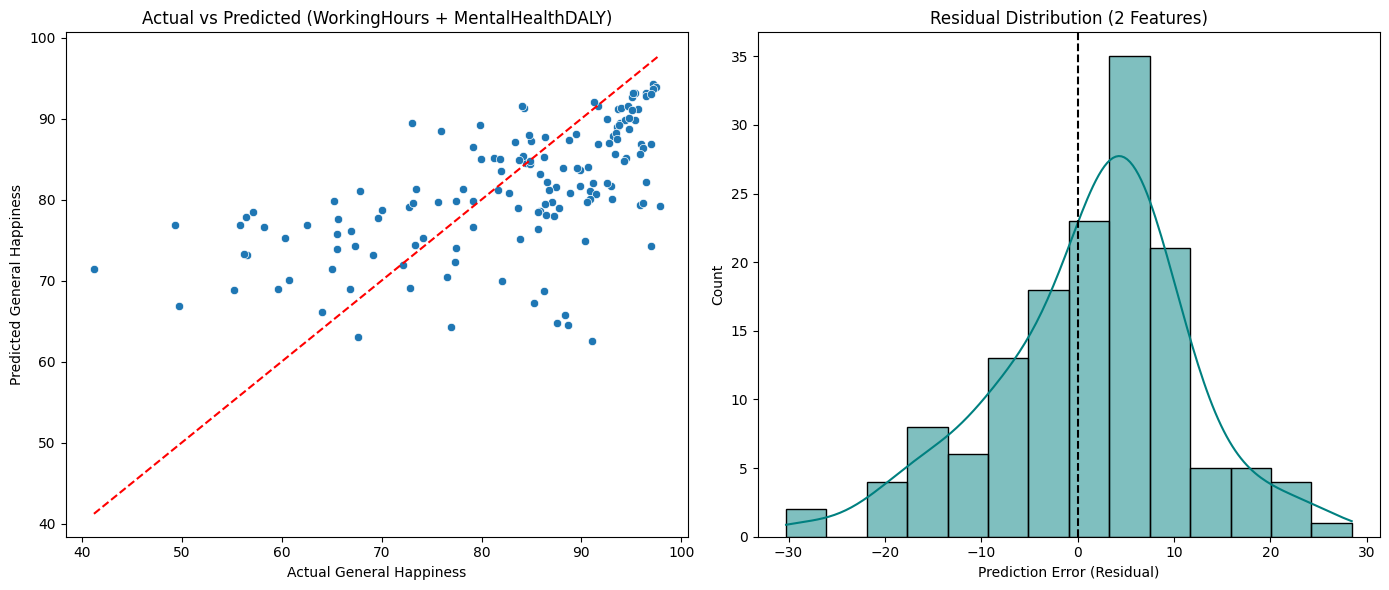

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load datasets
df_main = pd.read_csv("cleaned_data/workinghours_generalhappiness_merged.csv")
df_mental = pd.read_csv("cleaned_data/mental_health_cleaned.csv")

# 2. Average DALY per country
df_mental_avg = df_mental.groupby("Entity", as_index=False)["MentalHealthDALY"].mean()

# 3. Merge only on 'Entity' (not Year)
df_merged = pd.merge(df_main, df_mental_avg, on="Entity", how="inner")

# 4. Drop rows with missing values if any
df_merged = df_merged.dropna(subset=["WorkingHours", "GeneralHappiness", "MentalHealthDALY"])

# 5. Save the merged dataset
df_merged.to_csv("cleaned_data/happiness_working_mental_combined_entity.csv", index=False)

# 6. Define features and target
X = df_merged[["WorkingHours", "MentalHealthDALY"]]
y = df_merged["GeneralHappiness"]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 9. Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Multi-Feature Model Performance (Entity-based):")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 10. Visualize results
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual General Happiness")
plt.ylabel("Predicted General Happiness")
plt.title("Actual vs Predicted (WorkingHours + MentalHealthDALY)")

# Plot 2: Residual Distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color="teal")
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Prediction Error (Residual)")
plt.title("Residual Distribution (2 Features)")

plt.tight_layout()
plt.show()


### Step 11  
### Comparing One-Feature and Two-Feature Models

In this step, the performance of two models is compared:

- **Model 1:** Uses only `WorkingHours` to predict `GeneralHappiness`
- **Model 2:** Uses both `WorkingHours` and `MentalHealthDALY` as features

The table below shows the results of both models:

| Metric     | One Feature (`WorkingHours`) | Two Features (`WorkingHours` + `MentalHealthDALY`) |
|------------|------------------------------|----------------------------------------------------|
| R²         | 0.307                        | 0.332                                              |
| MAE        | 7.52                         | 8.07                                               |
| RMSE       | 9.51                         | 10.29                                              |

---

###  Explanation of Metrics:

- **R² (R-squared):**  
  → The second model has a **slightly higher R²**, which means it explains the data **better**.

- **MAE (Mean Absolute Error):**  
  Shows the average size of prediction errors.  
  A lower MAE is better.  
  → The first model has a **smaller MAE**, meaning it is more **consistent**.

- **RMSE (Root Mean Squared Error):**  
  Measures the standard deviation of errors.  
  A lower RMSE means fewer large errors.  
  → The first model has a **lower RMSE**, which indicates it handles **outliers** better.

---

###  Summary:

- The second model has **better R²**, so it understands the data more.
- But the first model has **less error**, so it is more stable.
- Adding mental health data gives **slight improvement**, but may also introduce **new variability**.

